# CNN


In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


Found 2496 images belonging to 4 classes.
Found 623 images belonging to 4 classes.
[0. 0. 0. 1.]


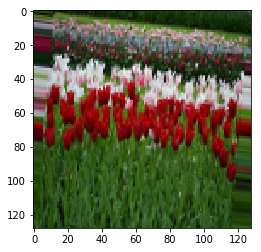

[0. 0. 1. 0.]


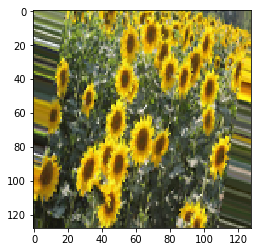

[1. 0. 0. 0.]


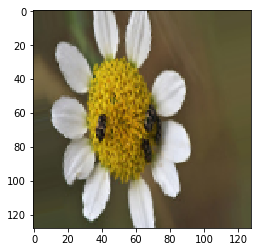

[1. 0. 0. 0.]


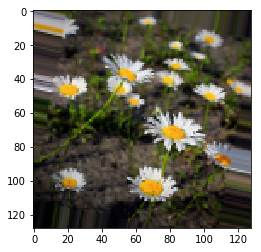

[0. 0. 0. 1.]


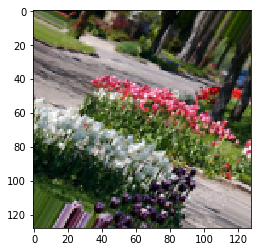

[0. 0. 0. 1.]


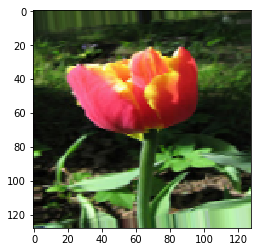

[0. 1. 0. 0.]


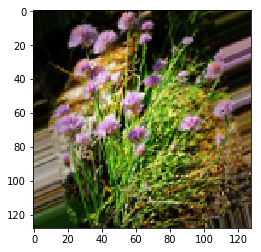

[0. 0. 0. 1.]


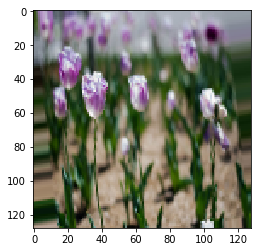

[0. 0. 1. 0.]


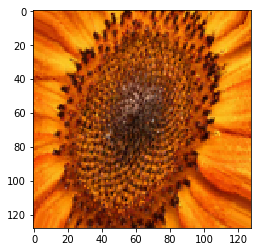

[0. 0. 0. 1.]


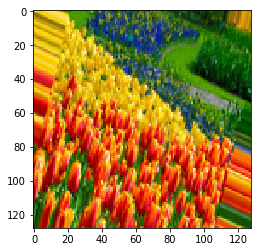

In [2]:
img_size = 128
datasetpath = 'dataset'

# Part 1: Processing the data
#print(os.listdir("dataset/training"))

#Data augmentation (seprate dataset to traing, validation)
datagen = ImageDataGenerator(rescale = 1./255,
                             validation_split=0.2,
                             rotation_range=30,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# make sure the parent folder contains the dataset folder
training_set = datagen.flow_from_directory(datasetpath,
                                                 subset="training",
                                                 target_size = (img_size, img_size),
                                                 class_mode = 'categorical')

validation_set = datagen.flow_from_directory(datasetpath,
                                            subset="validation",
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical')

x, y = training_set.next()
for i in range(10):
    print(y[i])
    plt.imshow(x[i])
    plt.show()

In [3]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation = 'sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
__________

D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=78, validation_data=<keras_pre..., validation_steps=20, epochs=200)`
  


Epoch 1/200
78/78 [==============================] - 76s 970ms/step - loss: 1.2460 - acc: 0.4127 - val_loss: 1.0611 - val_acc: 0.5618
Epoch 2/200
78/78 [==============================] - 77s 982ms/step - loss: 1.0627 - acc: 0.5505 - val_loss: 0.9363 - val_acc: 0.6067
Epoch 3/200
78/78 [==============================] - 69s 887ms/step - loss: 1.0162 - acc: 0.5817 - val_loss: 0.8896 - val_acc: 0.6324
Epoch 4/200
78/78 [==============================] - 69s 882ms/step - loss: 0.9392 - acc: 0.6062 - val_loss: 0.8865 - val_acc: 0.6228
Epoch 5/200
78/78 [==============================] - 67s 858ms/step - loss: 0.9079 - acc: 0.6166 - val_loss: 0.8286 - val_acc: 0.6453
Epoch 6/200
78/78 [==============================] - 72s 917ms/step - loss: 0.8859 - acc: 0.6314 - val_loss: 0.7993 - val_acc: 0.6726
Epoch 7/200
78/78 [==============================] - 69s 885ms/step - loss: 0.8689 - acc: 0.6374 - val_loss: 0.8024 - val_acc: 0.6693
Epoch 8/200
78/78 [==============================] - 71s 907ms

Epoch 62/200
78/78 [==============================] - 68s 873ms/step - loss: 0.3087 - acc: 0.8790 - val_loss: 0.6492 - val_acc: 0.8154
Epoch 63/200
78/78 [==============================] - 70s 892ms/step - loss: 0.3117 - acc: 0.8826 - val_loss: 0.6780 - val_acc: 0.8090
Epoch 64/200
78/78 [==============================] - 67s 861ms/step - loss: 0.2974 - acc: 0.8914 - val_loss: 0.7035 - val_acc: 0.8042
Epoch 65/200
78/78 [==============================] - 65s 838ms/step - loss: 0.3384 - acc: 0.8694 - val_loss: 0.6835 - val_acc: 0.8186
Epoch 66/200
78/78 [==============================] - 64s 825ms/step - loss: 0.3392 - acc: 0.8706 - val_loss: 0.6326 - val_acc: 0.8266
Epoch 67/200
78/78 [==============================] - 62s 789ms/step - loss: 0.2989 - acc: 0.8818 - val_loss: 0.6484 - val_acc: 0.8218
Epoch 68/200
78/78 [==============================] - 61s 777ms/step - loss: 0.3096 - acc: 0.8810 - val_loss: 0.7023 - val_acc: 0.8026
Epoch 69/200
78/78 [==============================] - 6

78/78 [==============================] - 61s 788ms/step - loss: 0.1732 - acc: 0.9339 - val_loss: 1.0502 - val_acc: 0.7994
Epoch 123/200
78/78 [==============================] - 61s 786ms/step - loss: 0.1991 - acc: 0.9319 - val_loss: 1.2320 - val_acc: 0.7689
Epoch 124/200
78/78 [==============================] - 61s 779ms/step - loss: 0.2095 - acc: 0.9259 - val_loss: 0.8100 - val_acc: 0.8074
Epoch 125/200
78/78 [==============================] - 61s 779ms/step - loss: 0.1770 - acc: 0.9331 - val_loss: 0.7936 - val_acc: 0.8299
Epoch 126/200
78/78 [==============================] - 61s 781ms/step - loss: 0.2145 - acc: 0.9223 - val_loss: 0.6605 - val_acc: 0.8331
Epoch 127/200
78/78 [==============================] - 61s 780ms/step - loss: 0.1757 - acc: 0.9339 - val_loss: 0.9495 - val_acc: 0.8090
Epoch 128/200
78/78 [==============================] - 62s 789ms/step - loss: 0.1698 - acc: 0.9379 - val_loss: 0.8537 - val_acc: 0.8170
Epoch 129/200
78/78 [==============================] - 61s 779

78/78 [==============================] - 61s 788ms/step - loss: 0.1418 - acc: 0.9551 - val_loss: 0.9336 - val_acc: 0.8266
Epoch 183/200
78/78 [==============================] - 61s 780ms/step - loss: 0.1380 - acc: 0.9495 - val_loss: 1.0144 - val_acc: 0.8090
Epoch 184/200
78/78 [==============================] - 61s 780ms/step - loss: 0.1483 - acc: 0.9451 - val_loss: 0.8928 - val_acc: 0.8202
Epoch 185/200
78/78 [==============================] - 61s 778ms/step - loss: 0.1545 - acc: 0.9459 - val_loss: 0.7871 - val_acc: 0.8202
Epoch 186/200
78/78 [==============================] - 61s 778ms/step - loss: 0.1351 - acc: 0.9483 - val_loss: 0.9037 - val_acc: 0.8266
Epoch 187/200
78/78 [==============================] - 61s 777ms/step - loss: 0.1658 - acc: 0.9419 - val_loss: 0.9274 - val_acc: 0.8186
Epoch 188/200
78/78 [==============================] - 61s 777ms/step - loss: 0.1275 - acc: 0.9527 - val_loss: 0.9995 - val_acc: 0.8090
Epoch 189/200
78/78 [==============================] - 61s 780

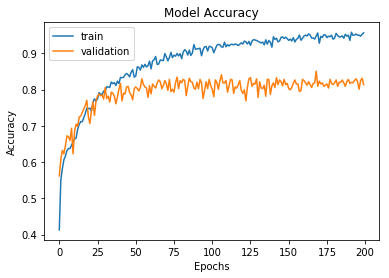

Save cnn model to disk


In [4]:
plt.tight_layout()

# Part 3 - Fitting the CNN to the images
History = model.fit_generator(training_set,
                              steps_per_epoch = len(training_set),
                              nb_epoch = 200,
                              validation_data = validation_set,
                              validation_steps = len(validation_set)
                             )

plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")
print("Save cnn model to disk")

# Part 6: Predicting new images
# see cnnPredict.py file